In [4]:
! which python

/c/Users/benjy/Anaconda3/python


In [2]:
np.load('hisat_geneDict.npy')

array({'out': [{'query': 'ENSMUSG00000000028', '_id': '12544', '_score': 15.983978, 'symbol': 'Cdc45'}, {'query': 'ENSMUSG00000000031', '_id': '14955', '_score': 15.342916, 'symbol': 'H19'}, {'query': 'ENSMUSG00000000049', '_id': '11818', '_score': 16.050726, 'symbol': 'Apoh'}, {'query': 'ENSMUSG00000000056', '_id': '67608', '_score': 16.06399, 'symbol': 'Narf'}, {'query': 'ENSMUSG00000000058', '_id': '12390', '_score': 15.309267, 'symbol': 'Cav2'}, {'query': 'ENSMUSG00000000078', '_id': '23849', '_score': 14.959178, 'symbol': 'Klf6'}, {'query': 'ENSMUSG00000000085', '_id': '29871', '_score': 16.027697, 'symbol': 'Scmh1'}, {'query': 'ENSMUSG00000000088', '_id': '12858', '_score': 16.02688, 'symbol': 'Cox5a'}, {'query': 'ENSMUSG00000000131', '_id': '74204', '_score': 15.307268, 'symbol': 'Xpo6'}, {'query': 'ENSMUSG00000000142', '_id': '12006', '_score': 15.971853, 'symbol': 'Axin2'}, {'query': 'ENSMUSG00000000168', '_id': '235339', '_score': 16.023067, 'symbol': 'Dlat'}, {'query': 'ENSM

In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
%matplotlib inline
from matplotlib_venn import venn3
import venn
import matplotlib.pyplot as plt
import seaborn as sns
import mygene as myg
import pickle
import csv
from pandas.plotting import scatter_matrix

Import all the datatables into pandas data frames

In [ ]:
hisat2 = pd.read_csv(r'FinalResultsTables/HISAT2_res_filt.csv', delimiter=',')
bowtie = pd.read_csv(r'FinalResultsTables/bowtie2_res_filt.csv', delimiter=',')
kallisto = pd.read_csv(r'FinalResultsTables/Kallisto_res_filt.csv', delimiter=',')
star = pd.read_csv(r'FinalResultsTables/STAR_res_filt.csv', delimiter=',')

In [ ]:
list(star)

Find the length of the L2FC column to make list for aligner identification

In [296]:
star_len = np.repeat('STAR',len(star.log2FoldChange.tolist()))
bowtie_len = np.repeat('Bowtie2',len(bowtie.log2FoldChange.tolist()))
hisat_len = np.repeat('HISAT2',len(hisat2.log2FoldChange.tolist()))
kal_len = np.repeat('Kallisto',len(kallisto.log2FoldChange.tolist()))

Concatenate columns from each data frame to make arrays of aligner ID length, L2FC, pval, and padj

In [297]:
concat_names = np.concatenate((np.asarray(star_len),
                 np.asarray(hisat_len),
                 np.asarray(kal_len),
                 np.asarray(bowtie_len)))

In [298]:
list(map(len, [star_len, hisat_len, kal_len, bowtie_len]))

[22484, 22440, 27303, 29700]

In [299]:
concat_log2FC =  np.concatenate((np.asarray(star.log2FoldChange.tolist()), 
                 np.asarray(hisat2.log2FoldChange.tolist()),
                 np.asarray(kallisto.log2FoldChange.tolist()),
                 np.asarray(bowtie.log2FoldChange.tolist())))

In [300]:
concat_pval =  np.concatenate((np.asarray(star.pval.tolist()), 
                 np.asarray(hisat2.pval.tolist()),
                 np.asarray(kallisto.pval.tolist()),
                 np.asarray(bowtie.pval.tolist())))

In [301]:
concat_padj =  np.concatenate((np.asarray(star.padj.tolist()),
                 np.asarray(hisat2.padj.tolist()),
                 np.asarray(kallisto.padj.tolist()),
                 np.asarray(bowtie.padj.tolist())))

In [302]:
concat_id =  np.concatenate((np.asarray(star.id.tolist()), 
                 np.asarray(hisat2.id.tolist()),
                 np.asarray(kallisto.id.tolist()),
                 np.asarray(bowtie.id.tolist())))

In [303]:
up_down = [ 'Up' if x else 'Down' for x in concat_log2FC > 0 ]
up_down_sig = [ 'Up' if x else 'Down' for x in np.logical_and(concat_log2FC > 0, concat_pval < 0.05) ]
up_down_sigadj = [ 'Up' if x else 'Down' for x in np.logical_and(concat_log2FC > 0, concat_padj < 0.05) ]

c:\users\benjy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
c:\users\benjy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
c:\users\benjy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
c:\users\benjy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\benjy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [304]:
 df = pd.DataFrame({'id': concat_id,
                    'Aligner': concat_names,
                   'L2FC': concat_log2FC,
                    'Pvalue': concat_pval,
                   'PolarityLFC': up_down,
                   'SigPolarityLFC': up_down_sig,
                   'AdjSigPolarityLFC': up_down_sigadj})

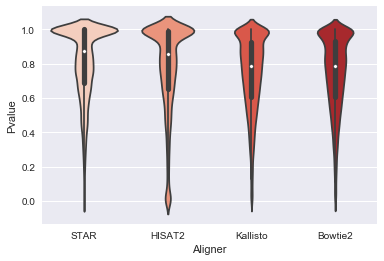

In [305]:
fig = plt.figure()
pval_vlnplot = sns.violinplot(x="Aligner", y="Pvalue", data=df, palette="Reds")
plt.savefig('pval_vlnplot')

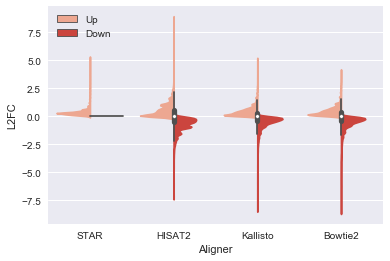

In [167]:
fig2 = plt.figure()
L2FC_vlnplot = sns.violinplot(x="Aligner", y="L2FC", 
                             split=True, hue="PolarityLFC", data=df, palette="Reds")
plt.legend(loc='upper left')
plt.savefig('L2FC_vlnplot')

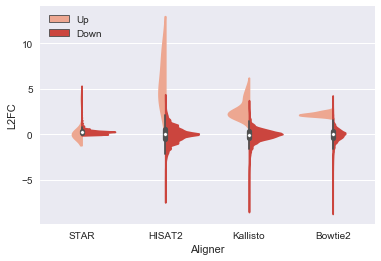

In [25]:
fig3 = plt.figure()
L2FC_vlnplot_sig = sns.violinplot(x="Aligner", y="L2FC", 
                             split=True, hue="SigPolarityLFC", data=df, palette="Reds")
plt.legend(loc='upper left')
plt.savefig('sig_L2FC_vlnplot')

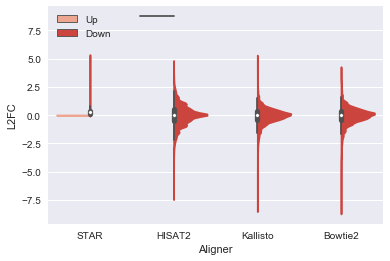

In [26]:
fig4 = plt.figure()
L2FC_vlnplot_sigadj = sns.violinplot(x="Aligner", y="L2FC", 
                             split=True, hue="AdjSigPolarityLFC", data=df, palette="Reds")
plt.legend(loc='upper left')
plt.savefig('adjsig_L2FC_vlnplot')

In [306]:
star_mask = [x for x in df.Aligner == 'STAR']
kallisto_mask = [x for x in df.Aligner == 'Kallisto']
hisat_mask = [x for x in df.Aligner == 'HISAT2']
bowtie_mask = [x for x in df.Aligner == 'Bowtie2']
star_id = df.id[star_mask]
kallisto_id = df.id[kallisto_mask]
hisat_id = df.id[hisat_mask]
bowtie_id = df.id[bowtie_mask]

c:\users\benjy\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
c:\users\benjy\anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


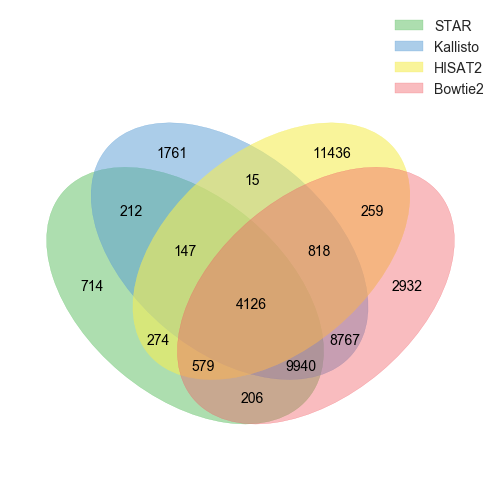

In [307]:
fig5 = plt.figure()
labels = venn.generate_petal_labels(map(set, [star_id, kallisto_id, hisat_id, bowtie_id]))
fig, ax = venn.venn4(labels, names=['STAR', 'Kallisto', 'HISAT2', 'Bowtie2'])
fig.show()
plt.savefig('DE Gene Count Venn')

In [308]:
star_upmask = [x for x in np.logical_and(df.Aligner == 'STAR', df.SigPolarityLFC=='Up')]
kallisto_upmask = [x for x in np.logical_and(df.Aligner == 'Kallisto', df.SigPolarityLFC=='Up')]
hisat_upmask = [x for x in np.logical_and(df.Aligner == 'HISAT2', df.SigPolarityLFC=='Up')]
bowtie_upmask = [x for x in np.logical_and(df.Aligner == 'Bowtie2', df.SigPolarityLFC=='Up')]
star_downmask = [x for x in np.logical_and(df.Aligner == 'STAR', df.SigPolarityLFC=='Down')]
kallisto_downmask = [x for x in np.logical_and(df.Aligner == 'Kallisto', df.SigPolarityLFC=='Down')]
hisat_downmask = [x for x in np.logical_and(df.Aligner == 'HISAT2', df.SigPolarityLFC=='Down')]
bowtie_downmask = [x for x in np.logical_and(df.Aligner == 'Bowtie2', df.SigPolarityLFC=='Down')]

star_upid = df.id[star_upmask]
kallisto_upid = df.id[kallisto_upmask]
hisat_upid = df.id[hisat_upmask]
bowtie_upid = df.id[bowtie_upmask]
star_downid = df.id[star_downmask]
kallisto_downid = df.id[kallisto_downmask]
hisat_downid = df.id[hisat_downmask]
bowtie_downid = df.id[bowtie_downmask]

c:\users\benjy\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
c:\users\benjy\anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


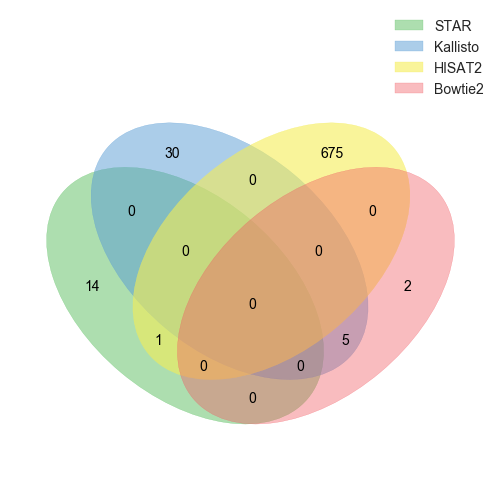

In [309]:
fig6 = plt.figure()
labels = venn.generate_petal_labels(map(set, [star_upid, kallisto_upid, hisat_upid, bowtie_upid]))
fig, ax = venn.venn4(labels, names=['STAR', 'Kallisto', 'HISAT2', 'Bowtie2'])
fig.show()
plt.savefig('upregulated Venn')

c:\users\benjy\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
c:\users\benjy\anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


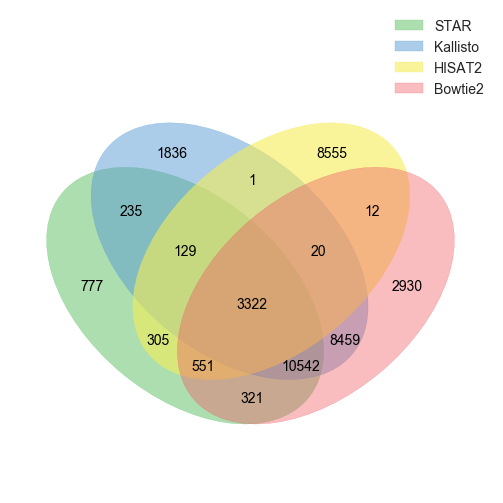

In [115]:
fig7 = plt.figure()
labels = venn.generate_petal_labels(map(set, [star_downid, kallisto_downid, hisat_downid, bowtie_downid]))
fig, ax = venn.venn4(labels, names=['STAR', 'Kallisto', 'HISAT2', 'Bowtie2'])
fig.show()
plt.savefig('downregulated Venn')

In [286]:
# create individual data frames of ensembl IDs for each aligner because they're not the same length
full_ensemblID_dflist = list(map(pd.DataFrame,[star_id, hisat_id, bowtie_id, kallisto_id]))

# save each list as a csv file
names = ['star', 'hisat', 'bowtie', 'kallisto']
n=0
for l in full_ensemblID_dflist:
    l.to_csv(names[n]+'_full_ensemblIDs.csv', index=False)
    n+=1

In [161]:
# cut off isoform number for gene symbol identification
star_geneList = [x.split('.')[0] for x in star_id]
hisat_geneList = [x.split('.')[0] for x in hisat_id]
bowtie_geneList = [x.split('.')[0] for x in bowtie_id]
kallisto_geneList = [x.split('.')[0] for x in kallisto_id]

In [163]:
mg = myg.MyGeneInfo()
star_geneDict = mg.querymany(star_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)
hisat_geneDict = mg.querymany(hisat_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)
bowtie_geneDict = mg.querymany(bowtie_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)
kallisto_geneDict = mg.querymany(kallisto_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-13182...done.
Finished.
61 input query terms found no hit:
	['ENSMUSG00000089855', 'ENSMUSG00000087560', 'ENSMUSG00000087304', 'ENSMUSG00000097298', 'ENSMUSG000
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-12898...done.
Finished.
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.

In [235]:
np.save('star_geneDict', star_geneDict)
np.save('hisat_geneDict', hisat_geneDict)
np.save('bowtie_geneDict', bowtie_geneDict)
np.save('kallisto_geneDict', kallisto_geneDict)
#kallisto_geneDict=np.load('kallisto_geneDict.npy').item()
#bowtie_geneDict=np.load('bowtie_geneDict.npy').item()
#hisat_geneDict=np.load('hisat_geneDict.npy').item()
#star_geneDict=np.load('star_geneDict.npy').item()

In [274]:
# get the gene symbols from MyGene dictionary corresponding to ensembl IDs as a list
def getSymList(geneDict):
    return [geneDict['out'][i]['symbol'] for i in range(len(geneDict['out'])) if 'symbol' in geneDict['out'][i].keys()]

star_geneSyms = getSymList(star_geneDict)
hisat_geneSyms = getSymList(hisat_geneDict)
bowtie_geneSyms = getSymList(bowtie_geneDict)
kallisto_geneSyms = getSymList(kallisto_geneDict)

# create individual data frames of gene symbols for each aligner because they're not the same length
geneSymsDict_list = list(map(pd.DataFrame,[star_geneSyms, hisat_geneSyms, bowtie_geneSyms, kallisto_geneSyms]))

# save each list as a csv file
names = ['star', 'hisat', 'bowtie', 'kallisto']
n=0
for l in geneSymsDict_list:
    l.to_csv(names[n]+'_geneSymbols.csv', index=False)
    n+=1

In [393]:
kallisto_idx = pd.Index(kallisto.pval)
star_idx = pd.Index(star.pval)
hisat2_idx = pd.Index(hisat2.pval)
bowtie_idx = pd.Index(bowtie.pval)

# get ensembl ids for top 20 differentially expressed genes
kallisto_top20_idx = [kallisto_idx.get_loc(i) for i in [np.sort(kallisto.pval)[i] for i in range(20)]]
bowtie_top20_idx = [bowtie_idx.get_loc(i) for i in [np.sort(bowtie.pval)[i] for i in range(20)]]
hisat2_top20_idx = [hisat2_idx.get_loc(i) for i in [np.sort(hisat2.pval)[i] for i in range(20)]]
star_top20_idx = [star_idx.get_loc(i) for i in [np.sort(star.pval)[i] for i in range(20)]]

kallisto_top20_ids = list(kallisto.id[kallisto_top20_idx])
bowtie_top20_ids = list(bowtie.id[bowtie_top20_idx])
hisat2_top20_ids = list(hisat2.id[hisat2_top20_idx])
star_top20_ids = list(star.id[star_top20_idx])

df_top20_ids = pd.DataFrame({
    'kallisto': kallisto_top20_ids,
    'bowtie': bowtie_top20_ids,
    'hisat2': hisat2_top20_ids,
    'star': star_top20_ids
})

df_top20_idx = pd.DataFrame({
    'kallisto': kallisto_top20_idx,
    'bowtie': bowtie_top20_idx,
    'hisat2': hisat2_top20_idx,
    'star': star_top20_idx
})
df_top20_ids;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BD025E9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000016BD73086A0>]], dtype=object)

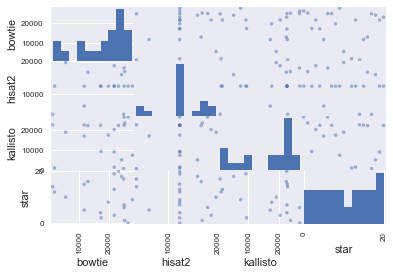

In [396]:
scatter_matrix(df_top20_idx)

In [285]:
# create individual data frames of ensembl IDs for each aligner because they're not the same length
ensemblID_dflist = list(map(pd.DataFrame,[star_geneList, hisat_geneList, bowtie_geneList, kallisto_geneList]))

# save each list as a csv file
names = ['star', 'hisat', 'bowtie', 'kallisto']
n=0
for l in ensemblID_dflist:
    l.to_csv(names[n]+'_ensemblIDs.csv', index=False)
    n+=1